Project 2

unemployment rate of New Zealand 

In [93]:
# imports
import requests                 # How Python gets the webpages
from bs4 import BeautifulSoup   # Creates structured, searchable object
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pprint as pp
from time import sleep
from datetime import datetime
from pylab import rcParams
%matplotlib inline

In [94]:
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

In [216]:
def get_scrap(url):
    response = requests.get(url)
    if response.status_code != 200:
        print("cannot get the page, check the Internet Connection!")
        return EOFError
    else:
        page = response.content
        scraping = BeautifulSoup(page, "lxml")
        return scraping

In [217]:
url_nzur = "https://www.educationcounts.govt.nz/statistics/indicators/data/education-and-learning-outcomes/3692"
scraping_nzur = get_scrap(url=url_nzur)

In [276]:
table_nzur = scraping.find_all("table", "data-table")
df_nzur = pd.read_html(str(table_nzur), index_col=0)
first_table_nzur = df_nzur[0][:-1].droplevel(level=1, axis=1)
first_table_nzur = first_table_nzur.astype(float)
first_table_nzur.index = first_table_nzur.index.astype(int)

In [277]:
first_table_nzur

Year,Bachelors or higher,Dips/certs 4-6,School qualification,No qualification,Total all qualifications
2007,2.3,2.5,4.2,6.1,3.7
2008,2.5,3.1,4.8,6.7,4.2
2009,3.6,4.5,7.4,9.7,6.1
2010,3.7,4.8,8.0,9.9,6.6
2011,3.2,4.9,8.4,9.8,6.5
2012,3.6,5.4,8.9,9.9,6.9
2013,3.5,3.8,7.4,8.7,5.9
2014,2.8,4.0,6.9,8.3,5.4
2015,2.9,4.0,6.8,8.5,5.4
2016,2.9,3.6,6.6,8.2,5.1


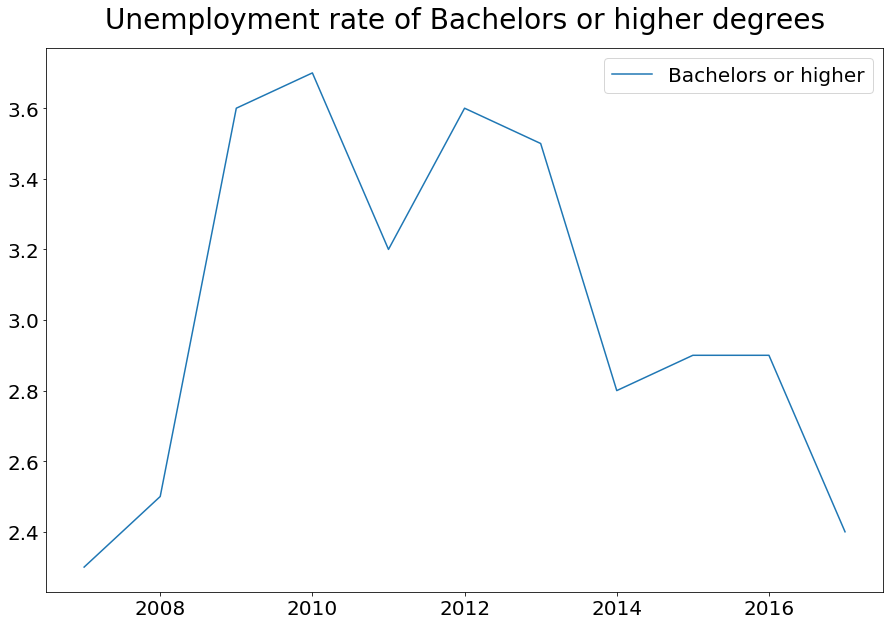

In [278]:
first_table_nzur["Bachelors or higher"].plot()
plt.title('Unemployment rate of Bachelors or higher degrees', fontdict={'fontsize':28}, pad=20)
plt.legend(loc='best')

In [281]:
fifth_table_nzur = df_nzur[4].droplevel(level=1, axis=1)
fifth_table_nzur

Year,15-19,20-24,25-34,35-44,45-54,55-64,Total
2007,14.5,6.5,3.4,2.4,2.0,1.5,3.7
2008,16.2,7.6,4.1,2.7,2.3,2.0,4.2
2009,23.5,11.7,5.7,4.1,3.7,3.2,6.1
2010,25.1,12.2,6.9,4.4,3.9,3.5,6.6
2011,25.7,12.4,6.0,4.8,4.1,3.3,6.5
2012,26.1,13.2,6.8,4.9,4.6,4.0,6.9
2013,23.2,10.8,5.8,4.3,3.7,3.8,5.9
2014,19.8,10.4,5.5,3.9,3.5,2.9,5.4
2015,20.3,9.9,5.4,3.5,3.5,3.3,5.4
2016,20.4,9.3,5.4,3.2,3.1,3.2,5.1


"24 percent of adults held a bachelors or higher qualification, 16 percent held a level 4 to 6 diploma or certificate and 10 percent of adults held either a level 1 to 3 tertiary certificate, or other post-school qualification, as their highest qualification."
https://www.educationcounts.govt.nz/publications/series/2531/profile-and-trends-2016-tertiary-education-outcomes-and-qualification-completions-part-2-of-6

question 1: unemployment rate of graduates with Bachelor's or higher degrees.
question 2: if a new graduate who got a bachelor's or higher degress, let's predict to what extend he/she will face unemployment.

In [181]:
percent = np.array([0.24, 0.16, 0.1, 1-(0.24 + 0.16 + 0.1)])
percent
# degrees = first_table_nzur.columns[:-1]
# adult_diploma_percent = pd.Series()
# adult_diploma_percent

array([[0.24],
       [0.16],
       [0.1 ],
       [0.5 ]])

In [283]:
adult_frame = first_table_nzur.copy().iloc[:,0:-1]
for i in range(len(percent)):
    adult_frame.iloc[:,i] = percent[i] * first_table_nzur.iloc[:,i]
adult_frame['Total all qualifications'] = adult_frame.apply(lambda x : x.sum(), axis=1)
adult_frame["bachelors proportion"] = adult_frame["Bachelors or higher"] / adult_frame["Total all qualifications"]


In [284]:
adult_frame

Year,Bachelors or higher,Dips/certs 4-6,School qualification,No qualification,Total all qualifications,bachelors proportion
2007,0.552,0.400,0.42,3.05,4.422,0.124830
2008,0.600,0.496,0.48,3.35,4.926,0.121803
2009,0.864,0.720,0.74,4.85,7.174,0.120435
2010,0.888,0.768,0.80,4.95,7.406,0.119903
2011,0.768,0.784,0.84,4.90,7.292,0.105321
2012,0.864,0.864,0.89,4.95,7.568,0.114165
2013,0.840,0.608,0.74,4.35,6.538,0.128480
2014,0.672,0.640,0.69,4.15,6.152,0.109233
2015,0.696,0.640,0.68,4.25,6.266,0.111076
2016,0.696,0.576,0.66,4.10,6.032,0.115385


In [229]:
#fig, ax = plt.subplots()
fifth_table_nzur = df_nzur[4].droplevel(level=1, axis=1)
fifth_table_nzur
#fifth_table_nzur.iloc[:, 2:3].plot()

Year,15-19,20-24,25-34,35-44,45-54,55-64,Total
2007,14.5,6.5,3.4,2.4,2.0,1.5,3.7
2008,16.2,7.6,4.1,2.7,2.3,2.0,4.2
2009,23.5,11.7,5.7,4.1,3.7,3.2,6.1
2010,25.1,12.2,6.9,4.4,3.9,3.5,6.6
2011,25.7,12.4,6.0,4.8,4.1,3.3,6.5
2012,26.1,13.2,6.8,4.9,4.6,4.0,6.9
2013,23.2,10.8,5.8,4.3,3.7,3.8,5.9
2014,19.8,10.4,5.5,3.9,3.5,2.9,5.4
2015,20.3,9.9,5.4,3.5,3.5,3.3,5.4
2016,20.4,9.3,5.4,3.2,3.1,3.2,5.1


In [296]:
fifth_table_nzur["bachelors_in_25-34"] = fifth_table_nzur["25-34"] * adult_frame["bachelors proportion"]
fifth_table_nzur

Year,15-19,20-24,25-34,35-44,45-54,55-64,Total,bachelors_in_25-34
2007,14.5,6.5,3.4,2.4,2.0,1.5,3.7,0.424423
2008,16.2,7.6,4.1,2.7,2.3,2.0,4.2,0.499391
2009,23.5,11.7,5.7,4.1,3.7,3.2,6.1,0.686479
2010,25.1,12.2,6.9,4.4,3.9,3.5,6.6,0.827329
2011,25.7,12.4,6.0,4.8,4.1,3.3,6.5,0.631925
2012,26.1,13.2,6.8,4.9,4.6,4.0,6.9,0.776321
2013,23.2,10.8,5.8,4.3,3.7,3.8,5.9,0.745182
2014,19.8,10.4,5.5,3.9,3.5,2.9,5.4,0.600780
2015,20.3,9.9,5.4,3.5,3.5,3.3,5.4,0.599808
2016,20.4,9.3,5.4,3.2,3.1,3.2,5.1,0.623077


In [294]:
fifth_table_nzur

Year,15-19,20-24,25-34,35-44,45-54,55-64,Total,bachelors_in_25-34
2007,14.5,6.5,3.4,2.4,2.0,1.5,3.7,0.424423
2008,16.2,7.6,4.1,2.7,2.3,2.0,4.2,0.499391
2009,23.5,11.7,5.7,4.1,3.7,3.2,6.1,0.686479
2010,25.1,12.2,6.9,4.4,3.9,3.5,6.6,0.827329
2011,25.7,12.4,6.0,4.8,4.1,3.3,6.5,0.631925
2012,26.1,13.2,6.8,4.9,4.6,4.0,6.9,0.776321
2013,23.2,10.8,5.8,4.3,3.7,3.8,5.9,0.745182
2014,19.8,10.4,5.5,3.9,3.5,2.9,5.4,0.600780
2015,20.3,9.9,5.4,3.5,3.5,3.3,5.4,0.599808
2016,20.4,9.3,5.4,3.2,3.1,3.2,5.1,0.623077


In [295]:
#adult_frame.apply(lambda x: x*fifth_table_nzur["25-34"])

for adults we could generate a general table of the unemployment rate using the above propotion and the unemployment rates of different qualification levels.
